In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA,KernelPCA

from sklearn.metrics import fbeta_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import linear_model
import sweetviz as sv


def f_measure(recall,precision):
	return (1+3*3)* (recall*precision) / ((3*3*recall) + precision) 





In [45]:
# Obtain the data for linear regression

x_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')


#train_report = sv.analyze(x_train)
#train_report.show_html("train_report.html",open_browser=True)

x_train.drop('Id', inplace=True, axis=1)
#x_train = pd.get_dummies(x_train)
#print("isnasum ",x_train.isna().sum())
x_train = x_train.fillna(0)



In [57]:


x_train.columns

visited = []

for col in x_train.columns:
	simbol = col[0:2]
	if simbol in visited:
		continue
	visited.append(simbol)
	#print(simbol)
	sim_cols = []
	#get all similar colum
	for col2 in x_train.columns:
		if simbol in col2:
			sim_cols.append(col2)
	
	if len(sim_cols) > 1:
		#print(len(sim_cols))
		data = x_train[sim_cols] 
		data = data.div(data.sum(axis=1),axis = 0)
		x_train[sim_cols] = data 
		#break

		#= x_train[sim_cols] / 10
		#print(x_train[sim_cols])
	#print(sim_cols)



#x_train.iloc[0]


In [5]:
x_train.columns


Index(['Id', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [22]:
x_train.drop('Id', inplace=True, axis=1)
#x_train = pd.get_dummies(x_train)
#print("isnasum ",x_train.isna().sum())
x_train = x_train.fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,test_size=0.3, random_state=42)


train_res = y_train 
test_res = y_test

#train_data, test_data, train_res, test_res


In [23]:
unknown = pd.read_csv('data/X_test.csv')
unknown.drop('Id', inplace=True, axis=1)
#unknown = pd.get_dummies(unknown)
unknown = unknown.fillna(0)

In [ ]:
col = x_train.columns

new_cols = []
for c in col:
	tag = c.split('_')[0]
	count=0
	for name in col:
		if tag in name:
			count+=1
	if count == 1:
		new_cols.append(c) 
		#print(c)
	#if [c==x for x in col]

train_data = x_train[new_cols]
test_data = x_test[new_cols]

print(len(new_cols))

unknown_data = unknown[new_cols]

In [24]:
print(len(x_train.columns))
#print(x_train.columns)
#does the same as next
#x_train.nunique()
#print("isnasum ",x_train.isna().sum())
headers = []

for col in x_train.columns:
	#if not "000" in col:
		#print(col,(x_train[col] == 0).sum())
		#continue
		#print(col)
	if (x_train[col] == 0).sum() < len(x_train)/2:
		#print(col,(x_train[col] == 0).sum(),len(x_train[col].value_counts()))
		headers.append(col)

#for col in x_train.columns:
#	if len(x_train[col].value_counts()) < len(x_train)/2:
#		headers.append(col)
		#print(col,len(x_train[col].value_counts()))


train_data = x_train[headers]
test_data = x_test[headers]

print(len(headers))

unknown_data = unknown[headers]


170
106


In [ ]:
#dont run this
train_data = x_train
test_data = x_test
unknown_data = unknown

acc, 0.9847475832438238
bas, 0.7271091112321311
Error, 426
F3, 0.4712041884816753
precision, 0.6077922077922078
recall, 0.45972495088408644


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


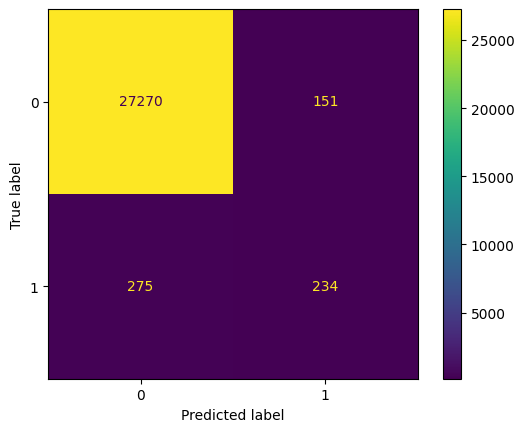

In [25]:

clf_dtc = DTC(random_state=42,criterion = "entropy",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss #gini
clf_dtc.fit(train_data,train_res)
predicted_Y = clf_dtc.predict(test_data)
#Y_test_proba = clf_dtc.predict_proba(test_data)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
pcm(clf_dtc,test_data,test_res)
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)
#print("f_measure",f_measure(recall,precision))

predicted_Y = clf_dtc.predict(unknown_data)


acc, 0.9836257309941521
bas, 0.6144645794339515
Error, 196
F3, 0.24703557312252963
precision, 0.625
recall, 0.23148148148148148


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


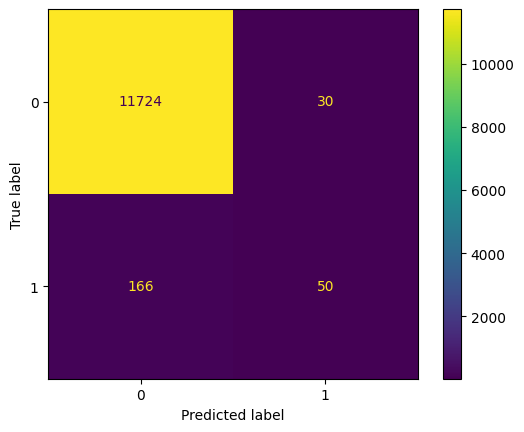

In [12]:
clf_knc = KNeighborsClassifier(2,algorithm="auto") 
#DTC(random_state=42,criterion = "gini",min_samples_split = 50,max_features = "sqrt")#"entropy"  #log_loss

clf_knc.fit(train_data,train_res)
predicted_Y = clf_knc.predict(test_data)

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)
pcm(clf_knc,test_data,test_res)


#predicted_Y = clf.predict(Test)

acc, 0.9878983172216255
bas, 0.7296778049089618
Error, 338
F3, 0.4815573770491804
precision, 0.7859531772575251
recall, 0.46168958742632615


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


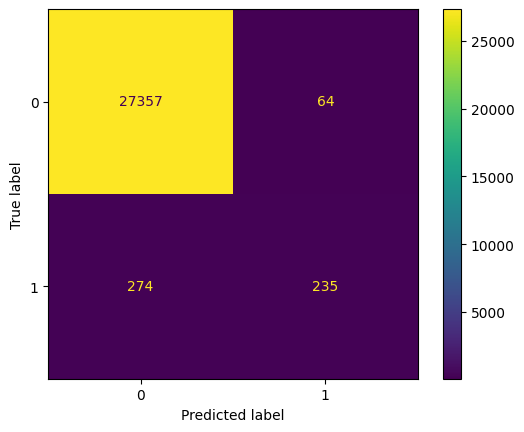

In [26]:
clf = RandomForestClassifier(n_estimators=100,bootstrap=True)
clf.fit(train_data,train_res)
predicted_Y = clf.predict(test_data)
Y_test_proba = clf.predict_proba(test_data)[:,1]

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)
pcm(clf,test_data,test_res)
predicted_Y = clf.predict(unknown_data)

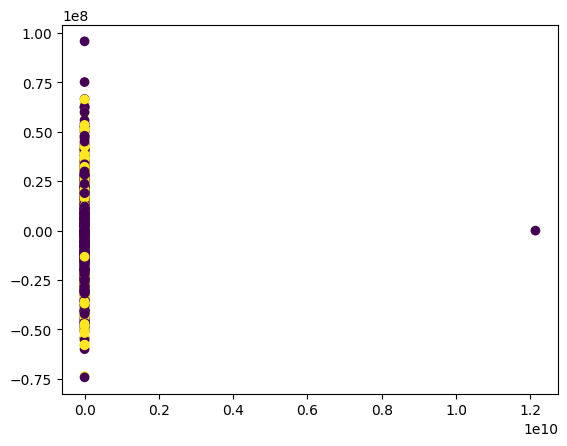

acc, 0.9840434419381788
bas, 0.6737564517043844
Error, 191
F3, 0.3669724770642202
precision, 0.5984251968503937
recall, 0.35185185185185186


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


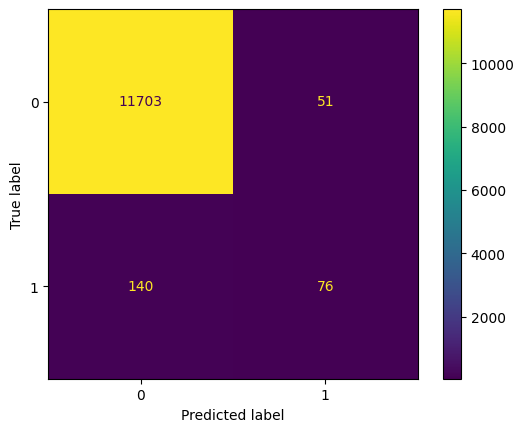

In [16]:
pca = PCA(n_components=10)
pca = pca.fit(train_data)
train_pca = pca.transform(train_data)

test_pca = pca.transform(test_data)

#Real_pca = pca.transform(Test)

#reg = linear_model.BayesianRidge()

#plt.scatter(train_pca)
plt.scatter(train_pca[:,1],train_pca[:,6],c=train_res)
plt.show()

#clf = DTC(random_state=42,criterion = "gini",min_samples_split = 100,max_features = "sqrt")#"entropy"  #log_loss
#clf = clf.fit(train_pca,test_res)
#reg = reg.fit(train_pca,y_train)

#print(reg.coef_)

#predicted_Y = clf.predict(test_pca)
#predicted_Y = reg.predict(test_pca)
#Y_test_proba = clf.predict_proba(test_pca)[:,1]


#print(acc(test_res,predicted_Y))

#print(bas(test_res,predicted_Y,adjusted=True))
#print(bas(test_res,predicted_Y,adjusted=False))

#pcm(clf,train_pca,y_train)


clf = RandomForestClassifier(n_estimators=20)
clf.fit(train_pca,train_res)
predicted_Y = clf.predict(test_pca)
Y_test_proba = clf.predict_proba(test_pca)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]


print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)


pcm(clf,test_pca,test_res)

Real_pca = pca.transform(unknown_data)

predicted_Y = clf.predict(Real_pca)



acc, 0.9646616541353383
bas, 0.9116247073482536
Error, 987
F3, 0.7351205530264711
precision, 0.32296296296296295
recall, 0.8565815324165029


d:\Programing\Gitted\Datamining_course\python_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


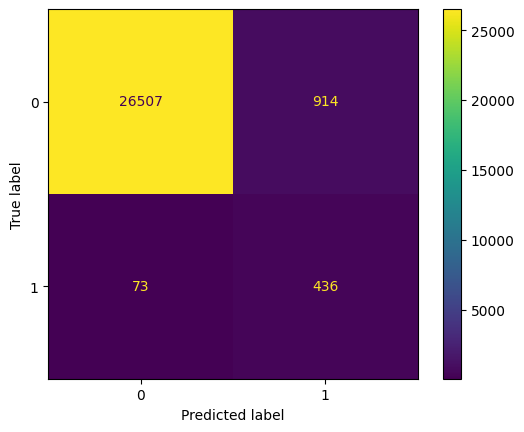

In [28]:
clf_dtc = GaussianNB()

clf_dtc.fit(train_data,train_res)
predicted_Y = clf_dtc.predict(test_data)
Y_test_proba = clf_dtc.predict_proba(test_data)[:,1]

#predicted_Y = [ i>0.2 for i in Y_test_proba]

print("acc,",acc(test_res,predicted_Y))
print("bas,",bas(test_res,predicted_Y))
error = 0
for i in range(len(test_res)):
	if test_res._values[i] != predicted_Y[i]:
		#print(test_res._values[i],predicted_Y[i],Y_test_proba[i])
		error += 1 
print("Error,",error)
print("F3,",fbeta_score(test_res, predicted_Y, average='binary', beta=3))
recall = recall_score(test_res,predicted_Y)
precision = precision_score(test_res,predicted_Y)
print("precision,",precision)
print("recall,",recall)

pcm(clf_dtc,test_data,test_res)


predicted_Y = clf_dtc.predict(unknown_data)





In [ ]:
#predicted_Y = clf.predict(Real_pca)
print(len(predicted_Y), sum(predicted_Y))

In [29]:
len(predicted_Y)

f = open("schmidt_laszlo_gnb.csv",'w')

f.write("Id,Predicted\n")
for i,val in enumerate(predicted_Y):
	f.write("{},{}\n".format(i,val))

f.flush()
f.close()

In [ ]:
pca = PCA(n_components=2)
pca = pca.fit(train)
a = pca.transform(train)
print(pca.explained_variance_ratio_)

print(len(train),",",len(a))
#plt.scatter(a,y_test)
#plt.show()

